# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

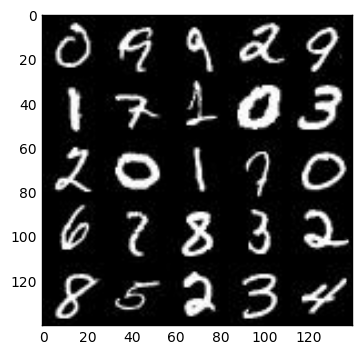

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

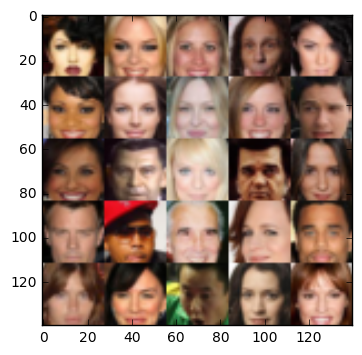

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real=tf.placeholder(tf.float32,(None, image_width, image_height, image_channels), name='input_real')
    input_z=tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32, (None), name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [81]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        #x0=tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        #relu0=tf.maximum(0.2 * x0, x0)
        
        x1=tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        #batch_norm1=tf.layers.batch_normalization(x1, training=True)
        relu1=tf.maximum(0.2 * x1, x1)
        
        x2=tf.layers.conv2d(images, 128, 5, strides=2, padding='same')
        batch_norm1=tf.layers.batch_normalization(x2, training=True)
        relu2=tf.maximum(0.2 * batch_norm1, batch_norm1)
        
        x3=tf.layers.conv2d(images, 256, 5, strides=2, padding='same')
        batch_norm2=tf.layers.batch_normalization(x3, training=True)
        relu3=tf.maximum(0.2 * batch_norm2, batch_norm2)
        
        flatten=tf.reshape(relu3,(-1, 4*4*256))
        logits=tf.layers.dense(flatten, 1)
        out=tf.sigmoid(logits)
        
        
        
    return logits, out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [90]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*256)
        # reshaping to start of convolutional stack
        # unflatten layer
        x1 = tf.reshape(x1, (-1, 4, 4, 256))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        lrelu1 = tf.maximum(alpha * x1, x1)       #leaky relu
        
        # 7X7x128
        x2 = tf.layers.conv2d_transpose(inputs=lrelu1, filters=128, kernel_size=4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        lrelu2 = tf.maximum(alpha * x2, x2)       #leaky relu
        
        # 14x14x64
        x3 = tf.layers.conv2d_transpose(inputs=lrelu2, filters=64, kernel_size=3, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        lrelu3 = tf.maximum(alpha * x3, x3)       #leaky relu
        
        #x31 = tf.layers.conv2d_transpose(inputs=lrelu3, filters=64, kernel_size=3, strides=2, padding='same')
        #x31 = tf.layers.batch_normalization(x3, training = is_train)
        #lrelu3 = tf.maximum(alpha * x3, x3)       #leaky relu
        
        # Output layer, 28x28xout_channel_dim
        logits = tf.layers.conv2d_transpose(inputs=lrelu3, filters=out_channel_dim, kernel_size=2, strides=2, padding='same')       
        out = tf.tanh(logits)
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [91]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [92]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [93]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [94]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images* 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real : batch_images, input_z : batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z : batch_z, input_real: batch_images,lr:learning_rate})
            
                if steps % 10 == 0:
                    # At the end of each 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr:learning_rate})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    # At the end of each 100 epochs, show generator output
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Discriminator Loss: 1.2236... Generator Loss: 0.6314
Epoch 1/2... Discriminator Loss: 1.5966... Generator Loss: 0.3317
Epoch 1/2... Discriminator Loss: 1.3275... Generator Loss: 0.5261
Epoch 1/2... Discriminator Loss: 1.3307... Generator Loss: 0.5284
Epoch 1/2... Discriminator Loss: 1.3725... Generator Loss: 0.4863
Epoch 1/2... Discriminator Loss: 1.2745... Generator Loss: 0.5649
Epoch 1/2... Discriminator Loss: 1.3439... Generator Loss: 0.5894


### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.5401
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.5086
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.4267
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 0.5074
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.4433
Epoch 1/1... Discriminator Loss: 1.4379... Generator Loss: 0.4486
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.5117
Epoch 1/1... Discriminator Loss: 1.4769... Generator Loss: 0.4606
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.4553
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.5651


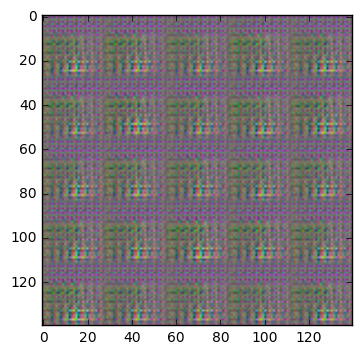

Epoch 1/1... Discriminator Loss: 1.1577... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.2096... Generator Loss: 0.5753
Epoch 1/1... Discriminator Loss: 1.5194... Generator Loss: 0.4625
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.5296... Generator Loss: 0.3764
Epoch 1/1... Discriminator Loss: 1.4920... Generator Loss: 0.4464
Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 1.0325... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.0474... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.6161


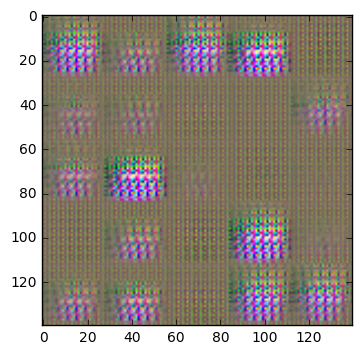

Epoch 1/1... Discriminator Loss: 1.1834... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.5694
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.4465
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.6706
Epoch 1/1... Discriminator Loss: 1.6179... Generator Loss: 0.3245
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.4499... Generator Loss: 0.4241
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.5703
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 0.5783


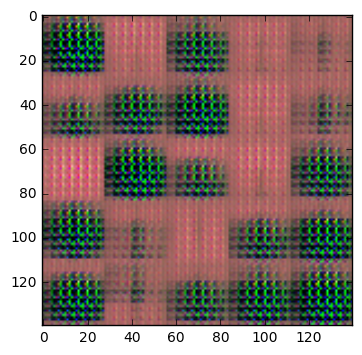

Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 0.5382
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.5541
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.4246
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.2872... Generator Loss: 0.5276
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.4740
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.5286
Epoch 1/1... Discriminator Loss: 1.3435... Generator Loss: 0.5381
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.4784
Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.5204


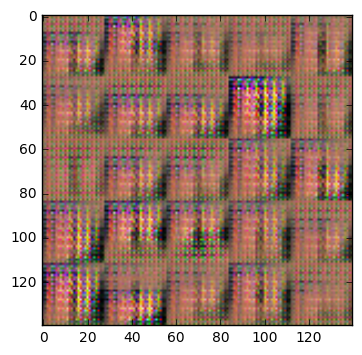

Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.4342
Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.4200
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.4977
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.4808
Epoch 1/1... Discriminator Loss: 1.4632... Generator Loss: 0.4616
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.4425
Epoch 1/1... Discriminator Loss: 1.5173... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.4059
Epoch 1/1... Discriminator Loss: 1.5391... Generator Loss: 0.4172
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.4243


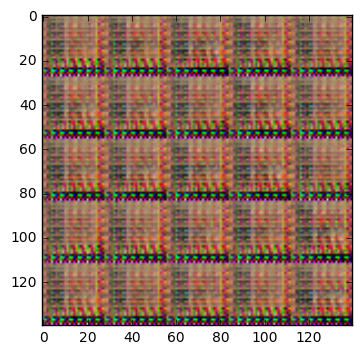

Epoch 1/1... Discriminator Loss: 1.4536... Generator Loss: 0.4191
Epoch 1/1... Discriminator Loss: 1.5195... Generator Loss: 0.4159
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.4230
Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 0.6305
Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.5763
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.5974
Epoch 1/1... Discriminator Loss: 1.1750... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.5844


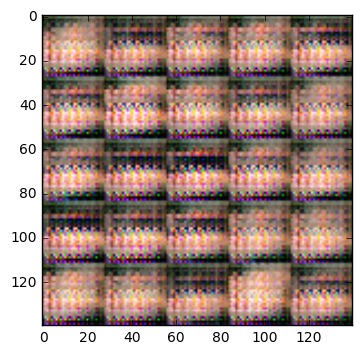

Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.5470
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.6841
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.5202
Epoch 1/1... Discriminator Loss: 1.2323... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.5725... Generator Loss: 0.3882
Epoch 1/1... Discriminator Loss: 1.2584... Generator Loss: 0.5771
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.5161
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.5244
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.5821


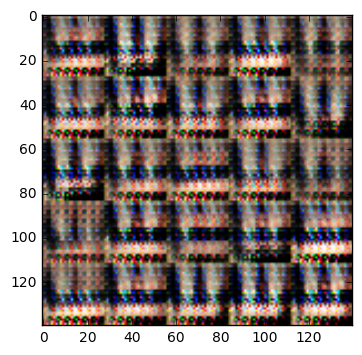

Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.4425... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.5453
Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.6240
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.5329
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 0.4494
Epoch 1/1... Discriminator Loss: 1.2959... Generator Loss: 0.5395
Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 0.5952
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.4592


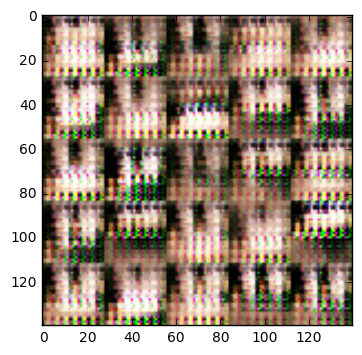

Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.1710... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.4559
Epoch 1/1... Discriminator Loss: 1.5128... Generator Loss: 0.4147
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.5236
Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 1.6092... Generator Loss: 0.3524
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.4681
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.4341


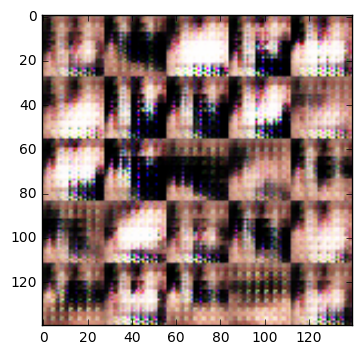

Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.6757
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.3600... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.6569


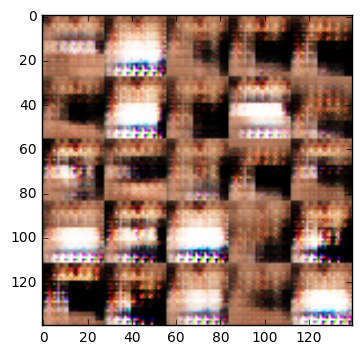

Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 0.6086
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.6677
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.6565


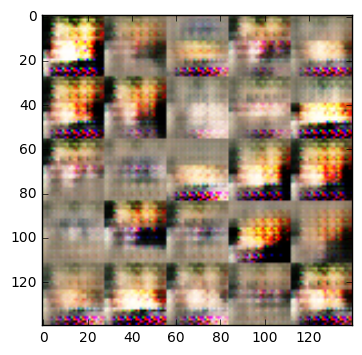

Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.6533
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.6337
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.6663


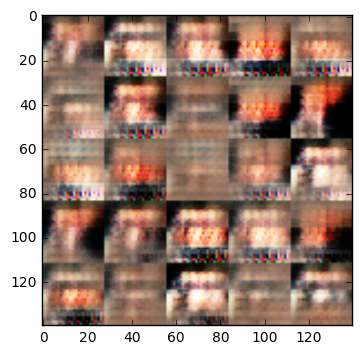

Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.6614
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.3807... Generator Loss: 0.6669


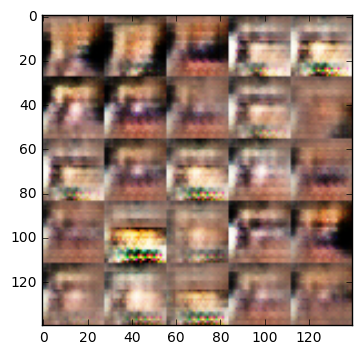

Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.6808
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.6803
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6724


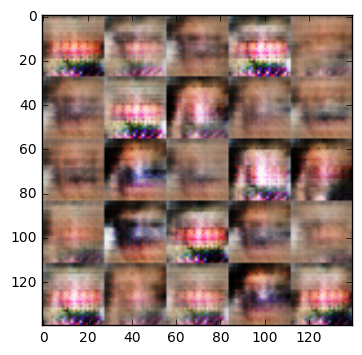

Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6873


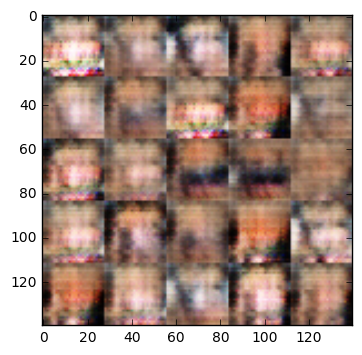

Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.6904
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.3856... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6901


In [17]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.